In [1]:
##  Import required python modules
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
import math

In [3]:
##  Define existing output location
##  i.e. Y:\LRMF\graphics\Columbia
output = input("Please provide a full-path output directory:")
##output = "Y:\\LRMF\\scratch\\Colorado"


Please provide a full-path output directory:"Y:\LRMF\BiodiversityBAP\Visuals\Colorado"


In [5]:
##  Ask for input file, full path
##  i.e. Y:\LRMF\R_tables\columbia_river_orig.csv
inputFile = input("Please provide a full-path input file:")
##inputFile = "Y:\\LRMF\\R_tables\\colorado_river_orig.csv"

data = pd.read_csv(inputFile,header=0)


Please provide a full-path input file:"Y:\LRMF\BiodiversityBAP\Inputs\Colorado_biodiv.csv"


In [6]:
##  define variable as count of columns in table.  Provides "stopping" point for calculations after indices have been added
last = len(data.columns)

In [7]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,PLKF,RBSK,RBTT,RDSN,RTCB,SDBS,SPDC,TFSD,WLYE,YLBH
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,0,10.913462,0,0,0,0.019231,0,0,0
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,0,6.427586,0,0,0,0.013793,0,0,0
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,0,6.271242,0,0,0,0.016340,0,0,0
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0,5.687500,0,0,0,0.000000,0,0,0
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,11.500000,0,0,0,0.000000,0,0,0


In [8]:
## add new column
data["Margalef"] = ""

In [9]:
##  for each row calculate Margalef Species Richness Index
for i in range(len(data)):
    data.loc[i,'Margalef'] = (len(data.iloc[i][4:last][data.iloc[i][4:last]>0])-1)/math.log(sum(data.iloc[i][4:last][data.iloc[i][4:last]>0]))


In [10]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,RBSK,RBTT,RDSN,RTCB,SDBS,SPDC,TFSD,WLYE,YLBH,Margalef
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,10.913462,0,0,0,0.019231,0,0,0,2.87598
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,6.427586,0,0,0,0.013793,0,0,0,3.10716
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,6.271242,0,0,0,0.016340,0,0,0,3.15943
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,5.687500,0,0,0,0.000000,0,0,0,0.57169
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,11.500000,0,0,0,0.000000,0,0,0,0


In [11]:
## get unique river segment names
segments = data.RiverSeg.unique()

In [12]:
##  get river name
river = data.iloc[0]["River"]

In [13]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0

##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["Margalef"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["Margalef"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    index += 1

##  update title
plt.title("Margalef Index, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel('Margalef Index')
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)
##  advance color index    
    
    
##  save figure
plt.savefig(output + "\\" + river + "_margalef.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

AttributeError: 'module' object has no attribute 'to_rgba'

In [12]:
## add new column
data["SWI_2"] = ""

In [13]:
##  for each row calculate Shannon-Wiener Log(2) Index
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])),2)
    data.loc[i,'SWI_2'] = swi

In [14]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,RBTT,RDSN,RTCB,SDBS,SPDC,TFSD,WLYE,YLBH,Margalef,SWI_2
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,10.913462,0,0,0,0.019231,0,0,0,2.87598,0.351927
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,6.427586,0,0,0,0.013793,0,0,0,3.10716,0.490434
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,6.271242,0,0,0,0.016340,0,0,0,3.15943,0.461377
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,5.687500,0,0,0,0.000000,0,0,0,0.57169,0.0865042
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,11.500000,0,0,0,0.000000,0,0,0,0,0


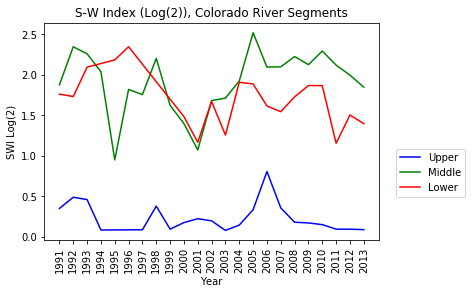

In [15]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["SWI_2"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["SWI_2"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    index += 1

##  update title
plt.title("S-W Index (Log(2)), " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel('SWI Log(2)')
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)
##  advance color index    
    
##  save figure
plt.savefig(output + "\\" + river + "_SWI_2.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [16]:
## add new column
data["SWI_e"] = ""

In [17]:
##  for each row calculate Shannon-Wiener Log(e) Index
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    data.loc[i,'SWI_e'] = swi

In [18]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,RDSN,RTCB,SDBS,SPDC,TFSD,WLYE,YLBH,Margalef,SWI_2,SWI_e
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,0,0,0.019231,0,0,0,2.87598,0.351927,0.243937
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,0,0,0.013793,0,0,0,3.10716,0.490434,0.339943
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,0,0,0.016340,0,0,0,3.15943,0.461377,0.319802
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0,0,0.000000,0,0,0,0.57169,0.0865042,0.0599602
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0,0.000000,0,0,0,0,0,0


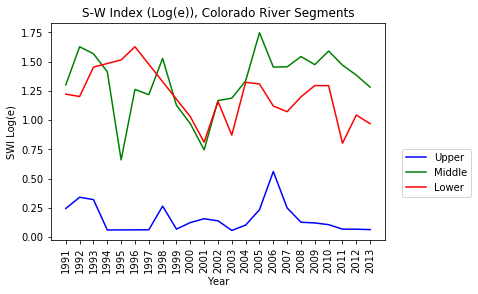

In [19]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["SWI_e"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["SWI_e"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("S-W Index (Log(e)), " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel('SWI Log(e)')
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
    
##  save figure
plt.savefig(output + "\\" + river + "_SWI_e.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [20]:
## add new column
data["SWI_10"] = ""

In [21]:
##  for each row calculate Shannon-Wiener Log(10) Index
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])),10)
    data.loc[i,'SWI_10'] = swi

In [22]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,RTCB,SDBS,SPDC,TFSD,WLYE,YLBH,Margalef,SWI_2,SWI_e,SWI_10
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,0,0.019231,0,0,0,2.87598,0.351927,0.243937,0.10594
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,0,0.013793,0,0,0,3.10716,0.490434,0.339943,0.147635
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,0,0.016340,0,0,0,3.15943,0.461377,0.319802,0.138888
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0,0.000000,0,0,0,0.57169,0.0865042,0.0599602,0.0260404
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0.000000,0,0,0,0,0,0,0


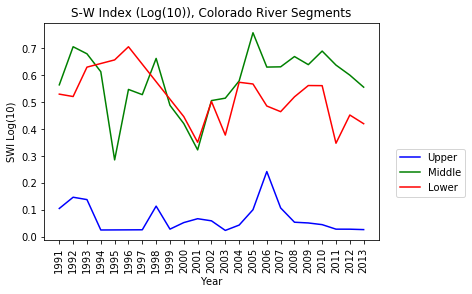

In [23]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["SWI_10"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["SWI_10"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y assigning color based on index
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("S-W Index (Log(10)), " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel('SWI Log(10)')
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
    
##  save figure
plt.savefig(output + "\\" + river + "_SWI_10.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [24]:
## add new column
data["lam"] = ""

In [25]:
##  for each row calculate Lambda
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]

    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    data.loc[i,'lam'] = lam


In [26]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,SDBS,SPDC,TFSD,WLYE,YLBH,Margalef,SWI_2,SWI_e,SWI_10,lam
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,0.019231,0,0,0,2.87598,0.351927,0.243937,0.10594,0.916313
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,0.013793,0,0,0,3.10716,0.490434,0.339943,0.147635,0.870082
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,0.016340,0,0,0,3.15943,0.461377,0.319802,0.138888,0.88243
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0.000000,0,0,0,0.57169,0.0865042,0.0599602,0.0260404,0.978497
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0.000000,0,0,0,0,0,0,0,1


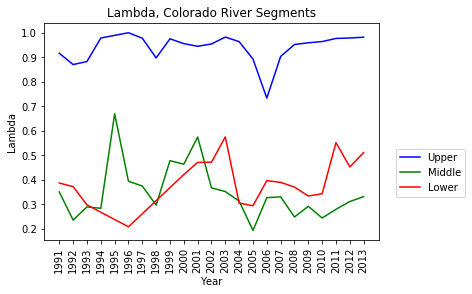

In [27]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["lam"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Lambda, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel('Lambda')
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
    
##  save figure
plt.savefig(output + "\\" + river + "_Lambda.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [28]:
## add new column
data["1-lam"] = ""

In [29]:
##  for each row calculate 1-Lambda
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]

    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    data.loc[i,'1-lam'] = 1 - lam

In [30]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,SPDC,TFSD,WLYE,YLBH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.019231,0,0,0,2.87598,0.351927,0.243937,0.10594,0.916313,0.0836871
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.013793,0,0,0,3.10716,0.490434,0.339943,0.147635,0.870082,0.129918
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.016340,0,0,0,3.15943,0.461377,0.319802,0.138888,0.88243,0.11757
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.000000,0,0,0,0.57169,0.0865042,0.0599602,0.0260404,0.978497,0.0215028
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0.000000,0,0,0,0,0,0,0,1,0


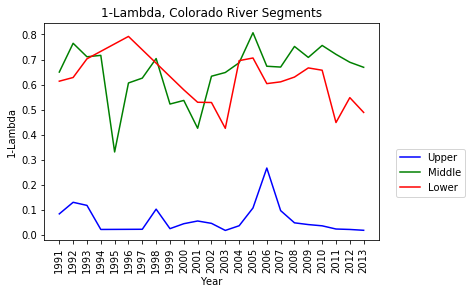

In [31]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["1-lam"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["1-lam"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("1-Lambda, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel('1-Lambda')
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure   
plt.savefig(output + "\\" + river + "_1-Lambda.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  show figure
plt.show()

In [32]:
## add new column
data["lam'"] = ""

In [33]:
##  for each row calculate Lambda Prime
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[i]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    
    
    array = data.iloc[i][4:last]
    num = 0.0
    for y in array:
        num += (y * (y-1))
    lam = num/(N*(N-1))
    data.loc[i,"lam'"] = lam

In [34]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,TFSD,WLYE,YLBH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam'
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,0,0,2.87598,0.351927,0.243937,0.10594,0.916313,0.0836871,0.908269
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,0,0,3.10716,0.490434,0.339943,0.147635,0.870082,0.129918,0.848049
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,0,0,3.15943,0.461377,0.319802,0.138888,0.88243,0.11757,0.86173
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0,0,0.57169,0.0865042,0.0599602,0.0260404,0.978497,0.0215028,0.97397
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0,0,0,0,0,1,0,1


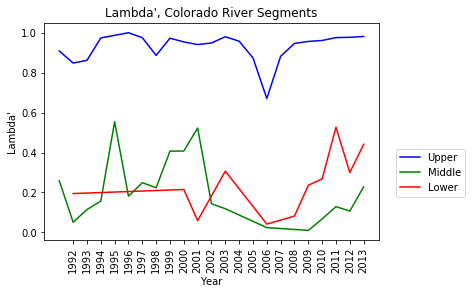

In [35]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["lam'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Lambda', " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("Lambda'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Lambda'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  show figure
plt.show()

In [36]:
##  add new column
data["1-lam'"] = ""

In [37]:
##  for each row calculate 1-Lambda Prime
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[i]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    
    
    array = data.iloc[i][4:last]
    num = 0.0
    for y in array:
        num += (y * (y-1))
    lam = num/(N*(N-1))
    data.loc[i,"1-lam'"] = 1 - lam

In [38]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,WLYE,YLBH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam'
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,0,2.87598,0.351927,0.243937,0.10594,0.916313,0.0836871,0.908269,0.091731
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,0,3.10716,0.490434,0.339943,0.147635,0.870082,0.129918,0.848049,0.151951
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,0,3.15943,0.461377,0.319802,0.138888,0.88243,0.11757,0.86173,0.13827
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0,0.57169,0.0865042,0.0599602,0.0260404,0.978497,0.0215028,0.97397,0.0260297
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0,0,0,0,1,0,1,0


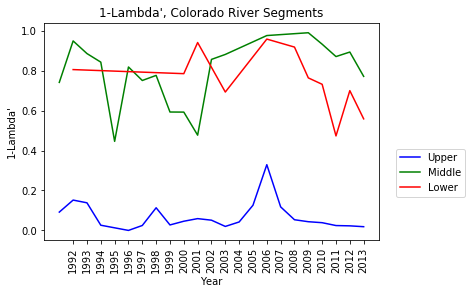

In [39]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]
    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["1-lam'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("1-Lambda', " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("1-Lambda'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
    
##  save figure
plt.savefig(output + "\\" + river + "_1-Lambda'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [40]:
data["N1"] = ""

In [41]:
##  for each row calculate Hill N1
for i in range(len(data)):
    N1 = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N1 += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    data.loc[i,'N1'] = math.exp(N1)

In [42]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,YLBH,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0,2.87598,0.351927,0.243937,0.10594,0.916313,0.0836871,0.908269,0.091731,1.27626
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0,3.10716,0.490434,0.339943,0.147635,0.870082,0.129918,0.848049,0.151951,1.40487
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0,3.15943,0.461377,0.319802,0.138888,0.88243,0.11757,0.86173,0.13827,1.37686
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0,0.57169,0.0865042,0.0599602,0.0260404,0.978497,0.0215028,0.97397,0.0260297,1.06179
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0,0,0,1,0,1,0,1


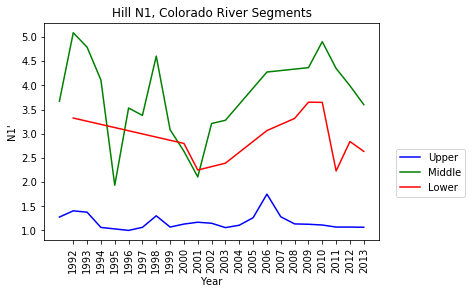

In [43]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N1"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N1, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N1'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N1.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [44]:
## add new column
data["N2"] = ""

In [45]:
##  for each row calculate Hill N2
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]

    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    data.loc[i,'N2'] = 1/lam

In [46]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,Margalef,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1,N2
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,2.87598,0.351927,0.243937,0.10594,0.916313,0.0836871,0.908269,0.091731,1.27626,1.09133
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,3.10716,0.490434,0.339943,0.147635,0.870082,0.129918,0.848049,0.151951,1.40487,1.14932
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,3.15943,0.461377,0.319802,0.138888,0.88243,0.11757,0.86173,0.13827,1.37686,1.13323
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.57169,0.0865042,0.0599602,0.0260404,0.978497,0.0215028,0.97397,0.0260297,1.06179,1.02198
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0,0,1,0,1,0,1,1


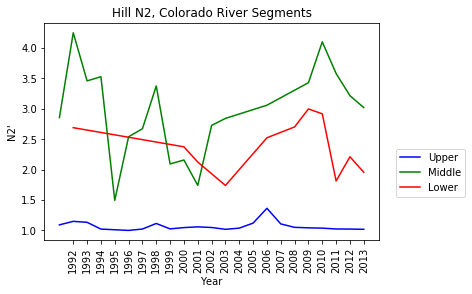

In [47]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N2"]
    
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N2, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N2'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N2.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [48]:
## add new column
data["N_Inf"] = ""

In [49]:
##  for each row calculate Hill N-infinity
for i in range(len(data)):
    
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    
    
    array = data.iloc[i][4:last]
    data.loc[i,'N_Inf'] = 1/(max(array)/N)

In [50]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,SWI_2,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1,N2,N_Inf
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.351927,0.243937,0.10594,0.916313,0.0836871,0.908269,0.091731,1.27626,1.09133,1.04493
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.490434,0.339943,0.147635,0.870082,0.129918,0.848049,0.151951,1.40487,1.14932,1.07296
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.461377,0.319802,0.138888,0.88243,0.11757,0.86173,0.13827,1.37686,1.13323,1.06514
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.0865042,0.0599602,0.0260404,0.978497,0.0215028,0.97397,0.0260297,1.06179,1.02198,1.01099
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,0,1,0,1,0,1,1,1


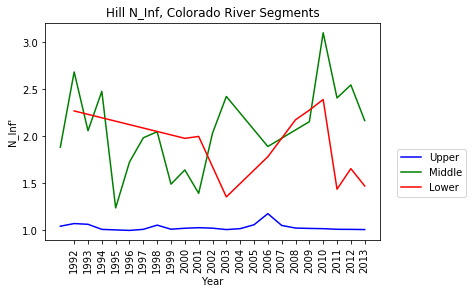

In [51]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N_Inf"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N_Inf, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N_Inf'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    

##  save figure
plt.savefig(output + "\\" + river + "_Hill_N_Inf.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [52]:
## add new column
data["N10"] = ""

In [53]:
##  for each row calculate Hill N10
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    data.loc[i,'N10'] = math.exp(swi)/len(data.iloc[i][4:last][data.iloc[i][4:last]>0])

In [54]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,SWI_e,SWI_10,lam,1-lam,lam',1-lam',N1,N2,N_Inf,N10
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.243937,0.10594,0.916313,0.0836871,0.908269,0.091731,1.27626,1.09133,1.04493,0.159533
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.339943,0.147635,0.870082,0.129918,0.848049,0.151951,1.40487,1.14932,1.07296,0.200695
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.319802,0.138888,0.88243,0.11757,0.86173,0.13827,1.37686,1.13323,1.06514,0.196694
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.0599602,0.0260404,0.978497,0.0215028,0.97397,0.0260297,1.06179,1.02198,1.01099,0.530897
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,0,1,0,1,0,1,1,1,1


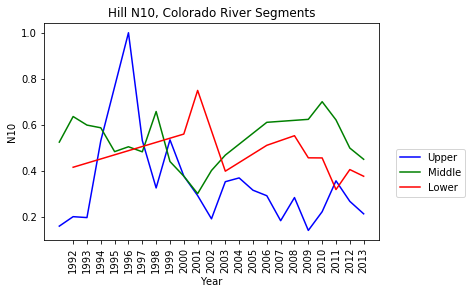

In [55]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0

##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N10"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N10, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N10")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N10.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [56]:
## add new column
data["N10'"] = ""

In [57]:
##  for each row calculate Hill N10 prime 
for i in range(len(data)):
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    try:
        data.loc[i,"N10'"] = (math.exp(swi)-1)/(len(data.iloc[i][4:last][data.iloc[i][4:last]>0])-1)
    except:
        data.loc[i,"N10'"] = 0

In [58]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,SWI_10,lam,1-lam,lam',1-lam',N1,N2,N_Inf,N10,N10'
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.10594,0.916313,0.0836871,0.908269,0.091731,1.27626,1.09133,1.04493,0.159533,0.0394663
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.147635,0.870082,0.129918,0.848049,0.151951,1.40487,1.14932,1.07296,0.200695,0.0674778
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.138888,0.88243,0.11757,0.86173,0.13827,1.37686,1.13323,1.06514,0.196694,0.0628092
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.0260404,0.978497,0.0215028,0.97397,0.0260297,1.06179,1.02198,1.01099,0.530897,0.0617942
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,1,0,1,0,1,1,1,1,0


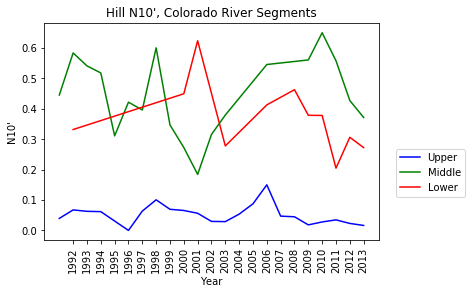

In [59]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N10'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N10', " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N10'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N10'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [60]:
## add new column
data["N21"] = ""

In [61]:
##  for each row calculate Hill N21
for i in range(len(data)):
    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    #N2
    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    N2 = 1/lam
        
    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    N1 = math.exp(swi)
    
    data.loc[i,"N21"] = N2/N1

In [62]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,lam,1-lam,lam',1-lam',N1,N2,N_Inf,N10,N10',N21
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.916313,0.0836871,0.908269,0.091731,1.27626,1.09133,1.04493,0.159533,0.0394663,0.855098
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.870082,0.129918,0.848049,0.151951,1.40487,1.14932,1.07296,0.200695,0.0674778,0.818097
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.88243,0.11757,0.86173,0.13827,1.37686,1.13323,1.06514,0.196694,0.0628092,0.82306
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.978497,0.0215028,0.97397,0.0260297,1.06179,1.02198,1.01099,0.530897,0.0617942,0.962499
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,1,0,1,0,1,1,1,1,0,1


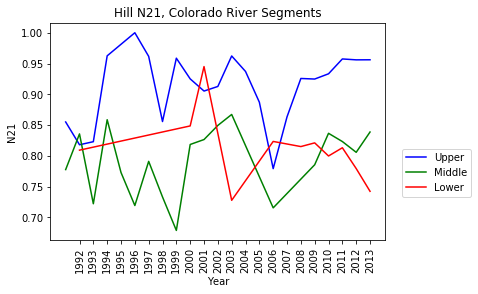

In [63]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N21"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N21, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N21")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N21.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [64]:
## add new column
data["N21'"] = ""

In [65]:
##  for each row calculate Hill N21 Prime
for i in range(len(data)):

    N = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            N += data.iloc[i][x]
    #N2
    lam = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        lam += (data.iloc[i][x]/N) * (data.iloc[i][x]/N)
    N2 = 1/lam

    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))
    N1 = math.exp(swi)


    data.loc[i,"N21'"] = (N2-1)/(N1-1)

    


C:\ProgramData\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [66]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,1-lam,lam',1-lam',N1,N2,N_Inf,N10,N10',N21,N21'
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.0836871,0.908269,0.091731,1.27626,1.09133,1.04493,0.159533,0.0394663,0.855098,0.330591
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.129918,0.848049,0.151951,1.40487,1.14932,1.07296,0.200695,0.0674778,0.818097,0.368805
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.11757,0.86173,0.13827,1.37686,1.13323,1.06514,0.196694,0.0628092,0.82306,0.353543
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.0215028,0.97397,0.0260297,1.06179,1.02198,1.01099,0.530897,0.0617942,0.962499,0.355622
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,0,1,0,1,1,1,1,0,1,NaN


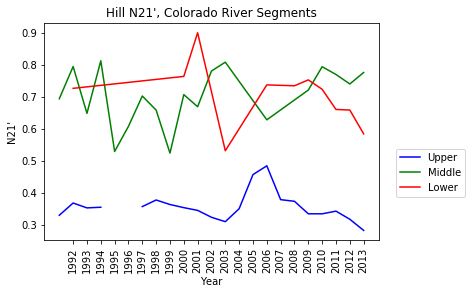

In [67]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["N21'"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Hill N21', " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("N21'")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)
    
##  save figure
plt.savefig(output + "\\" + river + "_Hill_N21'.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [68]:
## add new column
data["Pielou"] = ""

In [69]:
##  for each row calculate Pielou's Evenness Index 
for i in range(len(data)):

    count = 0.0
    hmax = 0.0
    
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            count += 1

    swi = 0.0
    for x in range(len(data.iloc[0]))[4:last]:
        if data.iloc[i][x] > 0:
            swi += -(data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])) * math.log((data.iloc[i][x]/sum(data.iloc[i][4:last][data.iloc[i][4:last]>0])))

          
    data.loc[i,'Pielou'] = swi/math.log(count)







C:\ProgramData\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [70]:
## display first 5 rows of data frame with new index
data.iloc[0:5]

,OBJECTID,River,RiverSeg,Year,BHSK,BKBH,BKCP,BKTT,BLGL,BNTT,...,lam',1-lam',N1,N2,N_Inf,N10,N10',N21,N21',Pielou
0,1,Colorado,Upper,1991,0,0.009615,0,0,0,0.048077,...,0.908269,0.091731,1.27626,1.09133,1.04493,0.159533,0.0394663,0.855098,0.330591,0.117309
1,2,Colorado,Upper,1992,0,0.000000,0,0,0,0.013793,...,0.848049,0.151951,1.40487,1.14932,1.07296,0.200695,0.0674778,0.818097,0.368805,0.174696
2,3,Colorado,Upper,1993,0,0.000000,0,0,0,0.019608,...,0.86173,0.13827,1.37686,1.13323,1.06514,0.196694,0.0628092,0.82306,0.353543,0.164346
3,4,Colorado,Upper,1994,0,0.000000,0,0,0,0.000000,...,0.97397,0.0260297,1.06179,1.02198,1.01099,0.530897,0.0617942,0.962499,0.355622,0.0865042
4,5,Colorado,Upper,1996,0,0.000000,0,0,0,0.000000,...,1,0,1,1,1,1,0,1,NaN,NaN


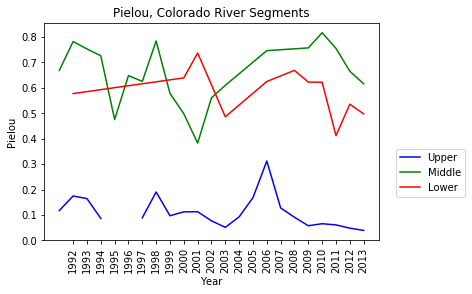

In [71]:
##  define color list
colors = ['b', 'g', 'r', 'k', 'c', 'm', 'y']
##  define index for iterating through color list
index = 0
##  for each river segment
for segment in segments:
    ##  subset df to non-zero values for the current river segment
    segDF = data.loc[data['RiverSeg'] == segment]
    segDF = segDF[segDF["lam'"]>0]

    ## sort based on year
    segDF = segDF.sort_values('Year')
    ## define x,y for plotting
    x = segDF["Year"]
    y = segDF["Pielou"]
    ## change name of y to Riv Seg for legend
    y.name = segment
    ##  build graph...
    ##  plot segment x vs y
    plt.plot(x,y,colors[index])
    ##  locate legend
    plt.legend(loc=(1.05,0.2))
    ##  advance color index
    index += 1

##  update title
plt.title("Pielou, " + river + " River Segments")
##  label x axis
plt.xlabel('Year')
##  label y axis
plt.ylabel("Pielou")
##  force x axis to integer values, increment by 1 year
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
##  rotate year labels 90 degrees
plt.xticks(rotation=90)    
    
##  save figure
plt.savefig(output + "\\" + river + "_Pielou.png", bbox_inches='tight',dpi=300, size=(2000,2000))
##  display figure
plt.show()

In [72]:
##  save dataframe with biodiversity indices to csv
data.to_csv(output + "\\" + river + "_biodiv.csv")